# Hypothesis Figures

In [1]:
import h5py
from os import walk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure

### Shared Functions

In [2]:
def plot_confusion_matrix(y_pred, y_true, labels, title, xlabel='Predicted', ylabel='Actual'):
    conf_matrix = confusion_matrix(y_true, y_pred)
    res = sns.heatmap(conf_matrix,cmap='binary',xticklabels=labels,yticklabels=labels,cbar=False,annot=True)
    for _, spine in res.spines.items():
        spine.set_visible(True)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.title(title, fontsize=16)
    plt.tight_layout()

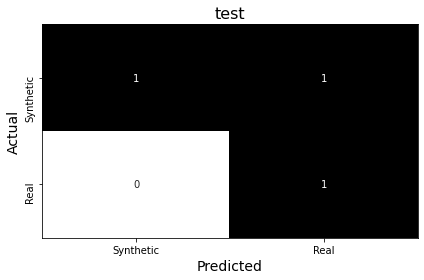

In [3]:
plot_confusion_matrix([1,0,1], [1,0,0], ['Synthetic', 'Real'], 'test')

In [4]:
def plot_side_by_side(signal_1, signal_2, title, label_1='label 1', label_2='label 2', xlabel='x', ylabel='y'):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(title, fontsize=18)
    ax1.plot(signal_1, c='black')
    ax1.set_title(label_1)
    ax2.plot(signal_2,  c='black')
    ax2.set_title(label_2)
    ax1.set(xlabel=xlabel, ylabel=ylabel)
    ax2.set(xlabel=xlabel, ylabel=ylabel)
    fig.tight_layout()

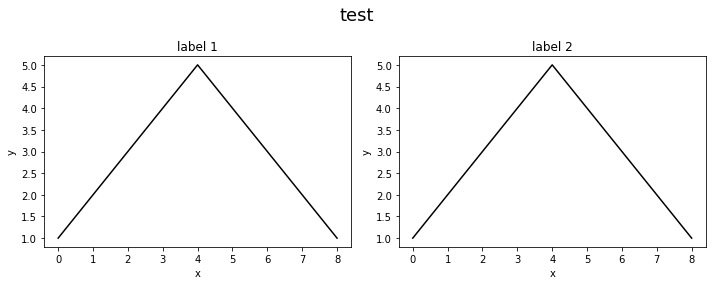

In [5]:
plot_side_by_side([1,2,3,4,5,4,3,2,1], [1,2,3,4,5,4,3,2,1],'test')

### Demo Data

In [6]:
f = h5py.File("/data/mcw_ecg/ecg-traces/preprocessed/traces.hdf5", 'r')
demo_test = f['signal'][4000]
demo_lead = demo_test[:, 1]
demo_heartbeat = demo_lead[950:1250]
demo_heartbeat_2 = demo_lead[1287:1550]
demo_heartbeat_3 = demo_lead[1650:1950]
demo_heartbeat_4 = demo_lead[1984:2300]
bad_heartbeat= demo_heartbeat_4[:263] + np.pad(demo_heartbeat_4[200:250] / 2, (150, 63), 'constant')

### Hypothesis 1
There is a statistically significant difference in the cross-correlation similarity score between the ECG signal of the average heartbeat in a single ECG test and the ECG signal of an unhealthy heartbeat in the same test. 

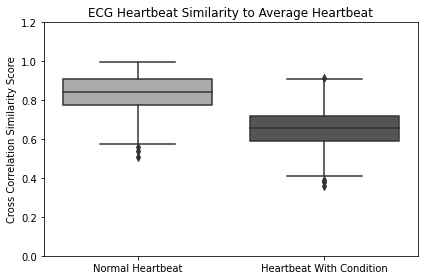

In [7]:
normal_label = "Normal Heartbeat"
condition_label = "Heartbeat With Condition"
normal_sim_scores = np.random.normal(0.85, 0.1, 1000)
normal_sim_scores = normal_sim_scores[normal_sim_scores <= 1]
normal_sim_scores = normal_sim_scores[0:500]
condition_sim_scores = np.random.normal(0.65, 0.1, 1000)
condition_sim_scores = condition_sim_scores[condition_sim_scores <= 0.95]
condition_sim_scores = condition_sim_scores[0:500]
boxplot_df = pd.DataFrame({normal_label:normal_sim_scores, condition_label: condition_sim_scores})
ax = sns.boxplot(data=boxplot_df, order=[normal_label, condition_label], palette='binary')
plt.title('ECG Heartbeat Similarity to Average Heartbeat')
ax.set(ylim=(0.0,1.2))
ax.set(ylabel='Cross Correlation Similarity Score')
plt.tight_layout()
plt.savefig('1_1.png')

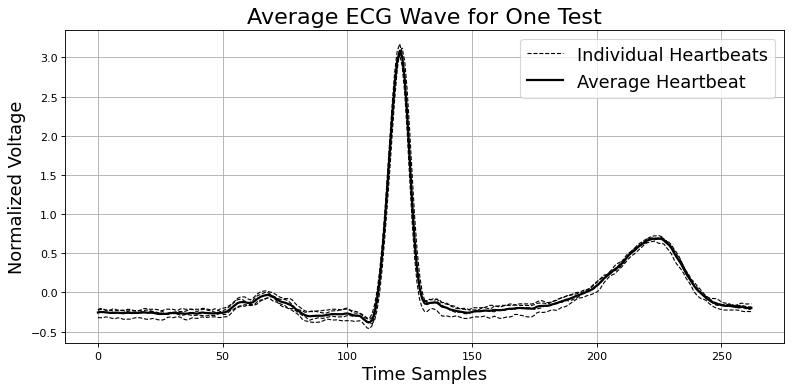

In [8]:
figure(figsize=(10, 5), dpi=80)
individual_beats = np.array([demo_heartbeat[:263], demo_heartbeat_2[:263], demo_heartbeat_3[:263], demo_heartbeat_4[:263]])
set_legend = True
for heartbeat in individual_beats:
    if set_legend:
        plt.plot(heartbeat, '--', c='black', linewidth=1, label='Individual Heartbeats')
        set_legend=False
    else:
        plt.plot(heartbeat, '--', c='black', linewidth=1)
average_heartbeat = np.mean(individual_beats, axis=0)
plt.plot(average_heartbeat,'b-', linewidth=2,c='black', label='Average Heartbeat')
plt.xlabel('Time Samples', fontsize=16)
plt.ylabel('Normalized Voltage', fontsize=16)
plt.title('Average ECG Wave for One Test', fontsize=20)
plt.legend(fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('1_2.png')

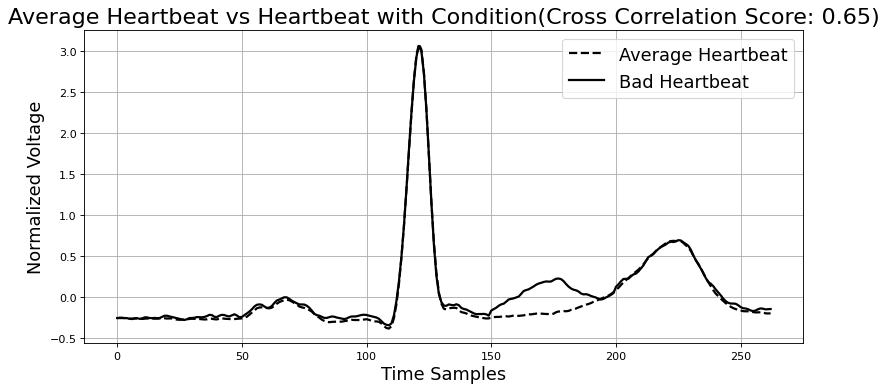

In [9]:
figure(figsize=(10, 5), dpi=80)
plt.plot(average_heartbeat, '--', c='black', linewidth=2, label='Average Heartbeat')
plt.plot(bad_heartbeat, linewidth=2, c='black', label='Bad Heartbeat')
plt.title('Average Heartbeat vs Heartbeat with Condition(Cross Correlation Score: 0.65)', fontsize=20)
plt.ylabel('Normalized Voltage', fontsize=16)
plt.xlabel('Time Samples', fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('1_3.png',  bbox_inches='tight')

### Hypothesis 2
A GAN, trained on individual heartbeat signals pulled from ECG tests, can synthesize signals that a cardiologist cannot identify more than 80% of the time from a set of 50:50 synthetic and real heartbeat ECG data. 

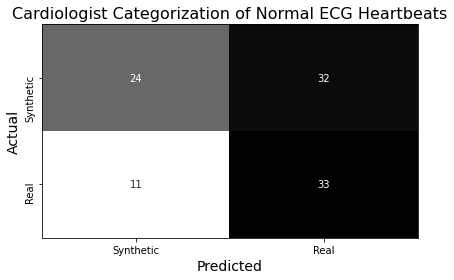

In [10]:
gold_standard = np.random.randint(2, size=100)
cardiologist_predictions = ((np.random.randint(2, size=100) + np.random.randint(2, size=100))  /2).astype(int) * -1 + 1
plot_confusion_matrix(cardiologist_predictions, gold_standard, ['Synthetic', 'Real'], 'Cardiologist Categorization of Normal ECG Heartbeats')
plt.savefig('2_1.png', bbox_inches='tight')

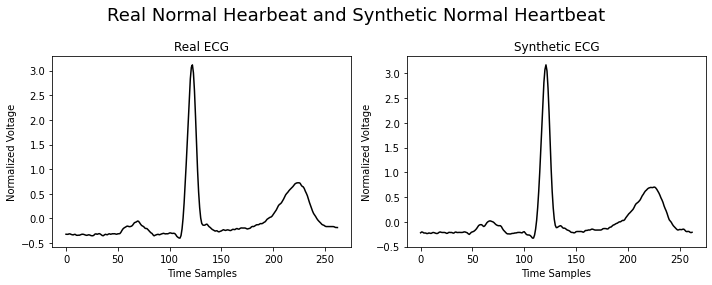

In [11]:
plot_side_by_side(demo_heartbeat_2[:263], demo_heartbeat_3[:263], 'Real Normal Hearbeat and Synthetic Normal Heartbeat',  label_1='Real ECG', label_2='Synthetic ECG', xlabel='Time Samples', ylabel='Normalized Voltage')
plt.tight_layout()
plt.savefig('2_2.png')

### Hypothesis 3
A GAN, using transfer learning from a GAN trained on a normal ECG heartbeat, can be trained to replicate ECG heartbeat signals associated with rare heart conditions, so a cardiologist cannot identify the synthetic signals from a 50:50 real and synthetic dataset more than 80% of the time. 

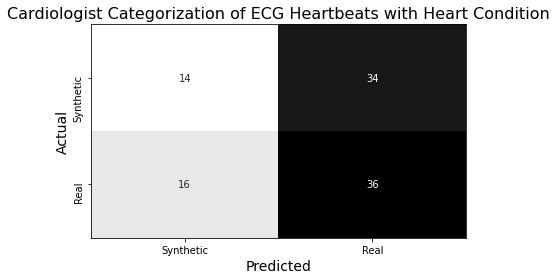

In [12]:
gold_standard = np.random.randint(2, size=100)
cardiologist_predictions = ((np.random.randint(2, size=100) + np.random.randint(2, size=100))  /2).astype(int) * -1 + 1
plot_confusion_matrix(cardiologist_predictions, gold_standard, ['Synthetic', 'Real'], 'Cardiologist Categorization of ECG Heartbeats with Heart Condition')
plt.tight_layout()
plt.savefig('3_1.png', bbox_inches='tight')

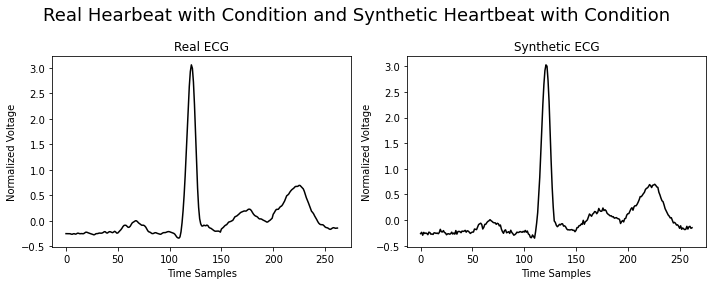

In [13]:
plot_side_by_side(bad_heartbeat[:263], (bad_heartbeat[:263]+np.random.normal(0,.02,263)), 'Real Hearbeat with Condition and Synthetic Heartbeat with Condition',  label_1='Real ECG', label_2='Synthetic ECG', xlabel='Time Samples', ylabel='Normalized Voltage')
plt.tight_layout()
plt.savefig('3_2.png')